<h2>9축센서 기반의 충돌감지 알고리즘 분석자료</h2>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import math

<h3>9축 데이터 파일 읽기</h3>

In [2]:
file_path = 'D:/Data/9-axis_data1.csv'
data1 = pd.read_csv(file_path, engine='python')

In [3]:
file_path = 'D:/Data/9-axis_data2.csv'
data2 = pd.read_csv(file_path, engine='python')

In [4]:
file_path = 'D:/Data/9-axis_data3.csv'
data3 = pd.read_csv(file_path, engine='python')

<br>
<h3>충돌방향에 따른 3축 가속도 데이터 변화</h3>
<hr>

- 9축 센서의 아래측에서 충돌이 발생하면, y축의 데이터가 양의 값으로 변화한 후 음의 값으로 변화함
- 9축 센서의 위측에서 충돌이 발생하면, y축의 데이터가 음의 값으로 변화한 후 양의 값으로 변화함
- 9축 센서의 좌측에서 충돌이 발생하면, x축의 데이터가 양의 값으로 변화한 후 음의 값으로 변화함
- 9축 센서의 우측에서 충돌이 발생하면, x축의 데이터가 음의 값으로 변화한 후 양의 값으로 변화함

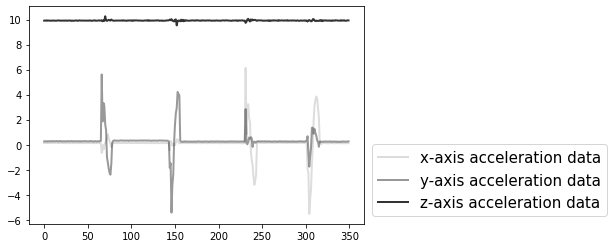

In [5]:
plt.plot(data1.acc_x[:350], linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data1.acc_y[:350], linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data1.acc_z[:350], linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<br>
<h3>충돌방향에 따른 3축 가속도 데이터 변화 상세</h3>
<hr>

- 충돌 방향에 따라 3축 가속도 데이터의 변화량의 차이를 보임
- x축으로의 변화량이 y축으로의 변화량보다 크다면, x축으로 가깝게 충돌이 발생
- 따라서, x, y축의 그래프 형태와 x, y축의 변화량으로 층돌 방향 산출

In [6]:
for i in range(len(data1.acc_x) - 200):
    data1.acc_x[i] = data1.acc_x[i + 200]
    data1.acc_y[i] = data1.acc_y[i + 200]
    data1.acc_z[i] = data1.acc_z[i + 200]

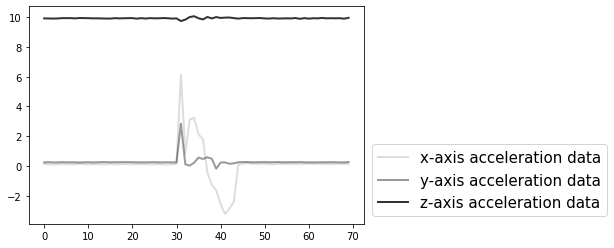

In [7]:
plt.plot(data1.acc_x[:70], linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data1.acc_y[:70], linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data1.acc_z[:70], linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<hr>

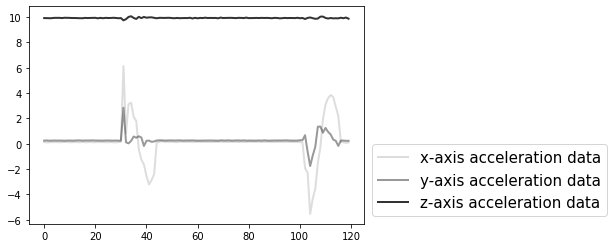

In [8]:
plt.plot(data1.acc_x[:120], linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data1.acc_y[:120], linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data1.acc_z[:120], linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<br>
<h3>충돌 강도에 따른 3축 가속도 데이터 변화</h3>
<hr>

- 3축 가속도 데이터는 충돌 강도에 따라 변화량이 큼
- z축으로는 충돌이 발생하지 않으므로, 변화량이 적은 것을 볼 수 있음

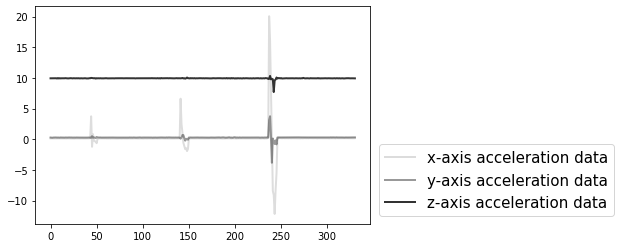

In [9]:
plt.plot(data2.acc_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data2.acc_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data2.acc_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<h4>충격량 산출식</h4>

In [10]:
shock = [math.sqrt((data2.acc_x[i]* data2.acc_x[i]) + (data2.acc_y[i] * data2.acc_y[i]) + (data2.acc_z[i] * data2.acc_z[i])) for i in range(len(data2.acc_x))]

<h4>충돌 강도에 따른 충격량</h4>

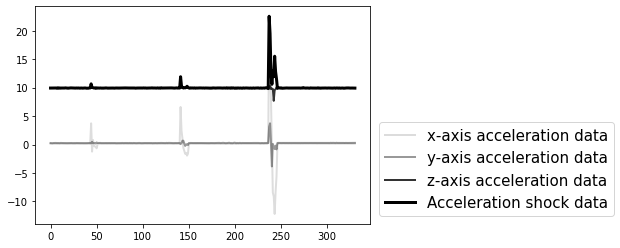

In [11]:
plt.plot(data2.acc_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data2.acc_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data2.acc_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')
plt.plot(shock, linestyle='-', color='#000000FF', linewidth='3', label='Acceleration shock data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<br>
<h3>다양한 충돌 데이터 예시</h3>
<hr>

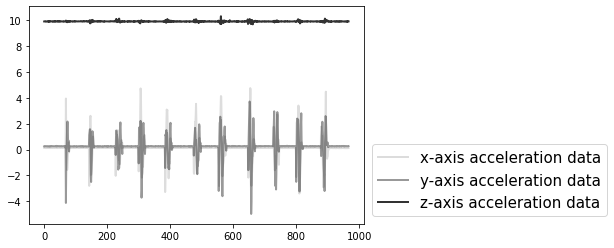

In [12]:
plt.plot(data3.acc_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data3.acc_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data3.acc_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

In [13]:
shock = [math.sqrt((data3.acc_x[i]* data3.acc_x[i]) + (data3.acc_y[i] * data3.acc_y[i]) + (data3.acc_z[i] * data3.acc_z[i])) for i in range(len(data3.acc_x))]

In [14]:
for i in range(len(data3.acc_x) - 50):
    data3.acc_x[i] = data3.acc_x[i + 50]
    data3.acc_y[i] = data3.acc_y[i + 50]
    data3.acc_z[i] = data3.acc_z[i + 50]

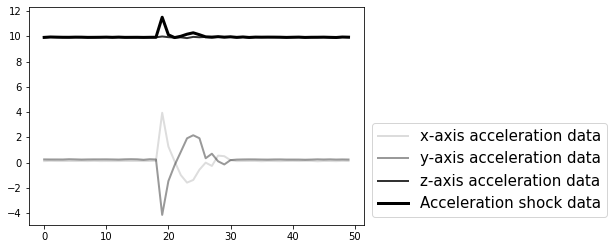

In [15]:
plt.plot(data3.acc_x[:50], linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(data3.acc_y[:50], linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(data3.acc_z[:50], linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')
plt.plot(shock[50:100], linestyle='-', color='#000000FF', linewidth='3', label='Acceleration shock data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<br>
<h3>시설물에 부착된 3축 가속도 센서 데이터</h3>
<hr>

In [16]:
file_path = 'D:/Data/shock.csv'
shock = pd.read_csv(file_path, engine='python')

In [17]:
shock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acc_x   215 non-null    float64
 1   acc_y   215 non-null    float64
 2   acc_z   215 non-null    float64
 3   vel_x   215 non-null    float64
 4   vel_y   215 non-null    float64
 5   vel_z   215 non-null    float64
 6   mag_x   215 non-null    float64
 7   mag_y   215 non-null    float64
 8   mag_z   215 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


<h4>3축 가속도 데이터</h4>

- 시설물에 충돌이 발생하고, 시설물이 기울어진다면, z축으로 발생하는 중력 가속도의 변화를 보임

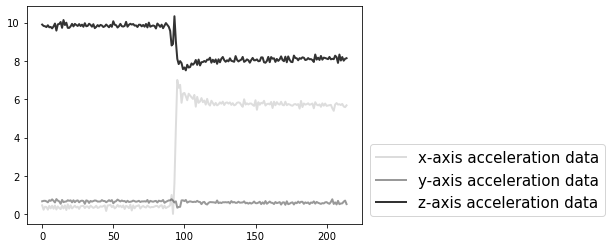

In [18]:
plt.plot(shock.acc_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(shock.acc_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(shock.acc_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<h4>3축 자이로 데이터</h4>

- 시설물에 충돌이 발생한다면, 충돌이 발생한 순간 자이로스코프 데이터의 변화를 보임

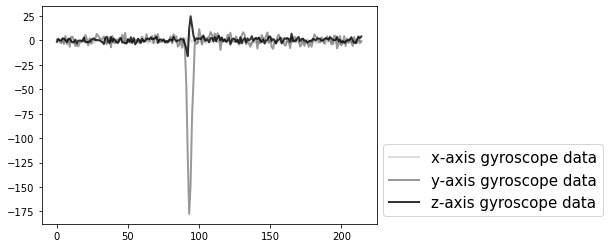

In [19]:
plt.plot(shock.vel_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis gyroscope data')
plt.plot(shock.vel_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis gyroscope data')
plt.plot(shock.vel_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis gyroscope data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.7, 0))

plt.show()

<h4>3축 지자기 데이터</h4>

- 시설물에 충돌이 발생하고, 시설물이 기울어진다면, 지자기 데이터에서 측정되는 지자기 값이 변화함

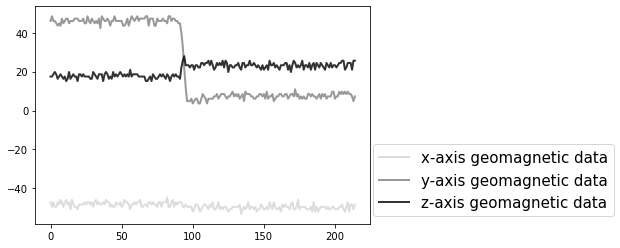

In [20]:
plt.plot(shock.mag_x, linestyle='-', color='#00000022', linewidth='2', label='x-axis geomagnetic data')
plt.plot(shock.mag_y, linestyle='-', color='#00000066', linewidth='2', label='y-axis geomagnetic data')
plt.plot(shock.mag_z, linestyle='-', color='#000000CC', linewidth='2', label='z-axis geomagnetic data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

<br>
<h3>충돌 에러 데이터</h3>
<hr>

- 시설물에 특정 상황에서 발생한 에러 데이터 분석

In [21]:
file_path = 'D:/Data/ErrorData.csv'
error = pd.read_csv(file_path, engine='python')

In [22]:
for i in range(len(error.acc_x) - 400):
    error.acc_x[i] = error.acc_x[i + 400]
    error.acc_y[i] = error.acc_y[i + 400]
    error.acc_z[i] = error.acc_z[i + 400]

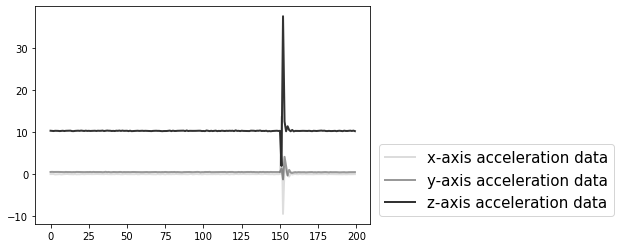

In [23]:
plt.plot(error.acc_x[:200], linestyle='-', color='#00000022', linewidth='2', label='x-axis acceleration data')
plt.plot(error.acc_y[:200], linestyle='-', color='#00000066', linewidth='2', label='y-axis acceleration data')
plt.plot(error.acc_z[:200], linestyle='-', color='#000000CC', linewidth='2', label='z-axis acceleration data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()

In [24]:
for i in range(len(error.vel_x) - 400):
    error.vel_x[i] = error.vel_x[i + 400]
    error.vel_y[i] = error.vel_y[i + 400]
    error.vel_z[i] = error.vel_z[i + 400]

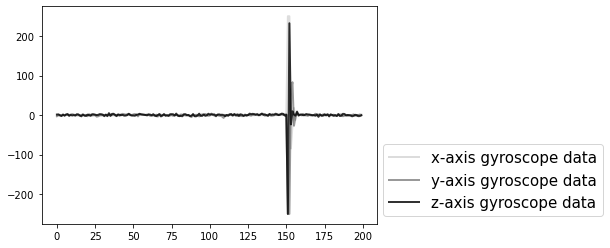

In [25]:
plt.plot(error.vel_x[:200], linestyle='-', color='#00000022', linewidth='2', label='x-axis gyroscope data')
plt.plot(error.vel_y[:200], linestyle='-', color='#00000066', linewidth='2', label='y-axis gyroscope data')
plt.plot(error.vel_z[:200], linestyle='-', color='#000000CC', linewidth='2', label='z-axis gyroscope data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.7, 0))

plt.show()

In [26]:
for i in range(len(error.mag_x) - 400):
    error.mag_x[i] = error.mag_x[i + 400]
    error.mag_y[i] = error.mag_y[i + 400]
    error.mag_z[i] = error.mag_z[i + 400]

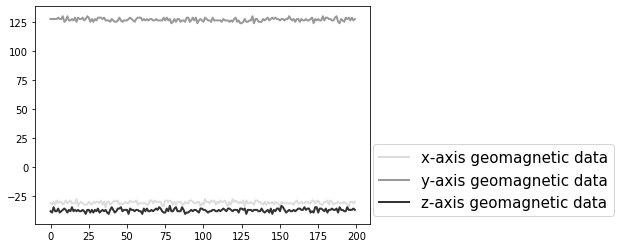

In [27]:
plt.plot(error.mag_x[:200], linestyle='-', color='#00000022', linewidth='2', label='x-axis geomagnetic data')
plt.plot(error.mag_y[:200], linestyle='-', color='#00000066', linewidth='2', label='y-axis geomagnetic data')
plt.plot(error.mag_z[:200], linestyle='-', color='#000000CC', linewidth='2', label='z-axis geomagnetic data')

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.75, 0))

plt.show()